### Introduction

Sam Badman May 5th 2022

I keep finding times when I need to convert a vector field from a spherical basis to a cartesian basis and it always takes some time to look things up and remember how it works, so here is a description of how it works and some python code that will hopefully be copyable in the future

The main formulae are scribed from http://plaza.obu.edu/corneliusk/mp/rauv.pdf and the use of Jacobians follows Riley, Hobson & Bence

In [1]:
# Libraries we'll need
import matplotlib.pyplot as plt
import numpy as np

#### The basic problem

Let's introduce the cartesian variables, x,y,z and the spherical components r,$\theta$,$\phi$ which are radius, polar angle (or colatitude) and azimuth (or longitude) respectively. In heliophysics, they are often also referred to as the RTN frame, which is identical and in the same order.

These coordinate frames all have unit vectors : $\boldsymbol{\hat{x}},\boldsymbol{\hat{y}},\boldsymbol{\hat{z}}$, and $\boldsymbol{\hat{r}},\boldsymbol{\hat{\theta}},\boldsymbol{\hat{\phi}}$ (or equivalently $\boldsymbol{\hat{R}},\boldsymbol{\hat{T}},\boldsymbol{\hat{N}}$).

Then we introduce a general vector field (i.e. a vector which is a function of a spatial position $\boldsymbol{r}$), $\boldsymbol{B(r)}$ which can be expressed in either basis :

$\boldsymbol{B(r)} = B_x(\boldsymbol{r}) \boldsymbol{\hat{x}} + B_y(\boldsymbol{r}) \boldsymbol{\hat{y}} + B_z(\boldsymbol{r}) \boldsymbol{\hat{z}} = B_r(\boldsymbol{r}) \boldsymbol{\hat{r}} + B_\theta(\boldsymbol{r}) \boldsymbol{\hat{\theta}} + B_\phi(\boldsymbol{r}) \boldsymbol{\hat{\phi}}$.

So the problem is, if we are given a vector field in one representation (e.g. $\boldsymbol{B(r)} = (B_r(\boldsymbol{r}),B_\theta(\boldsymbol{r}),B_\phi(\boldsymbol{r})$), how can be obtain the cartesian components, or vice versa? 

Let's proceed by building up a sketch and writing down the mathematical conversions as we go.

First, let's define a position vector in both cartesian and spherical coordinates. $\boldsymbol{r} = (x,y,z) = (r,\theta,\phi)$. We have that :

$x = r \sin \theta \cos \phi$ 

$y = r \sin \theta \sin \phi$ 

$z = r \cos \theta $ 

and inversely :

$ r = \sqrt{x^2 + y^2 +z^2} $ 

$ \theta = \arccos(z/r)$ 

$ \phi = \verb+arctan2+(y,x) $


In [2]:
# Position Vector and conversion to spherical coordinates
rvec = np.array([1,1,2])
rvec = rvec/np.linalg.norm(rvec) # Make the position vector have length 1
r = np.linalg.norm(rvec)
theta = np.arccos(rvec[2]/r)
phi = np.arctan2(rvec[1],rvec[0])

We can sketch this vector in terms of both these sets of coordinates.

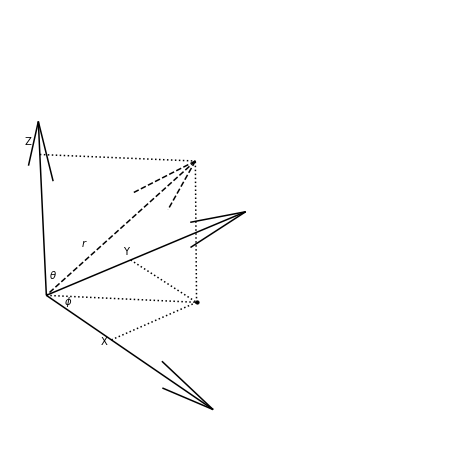

In [3]:
def baseplot(elview=30,azview=-40) :
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection="3d")

    # Plot cartesian axes
    ax.quiver(0,0,0,1,0,0,color="black")
    ax.quiver(0,0,0,0,1,0,color="black")
    ax.quiver(0,0,0,0,0,1,color="black")

    # Plot vector and useful constructions
    ax.quiver(0,0,0,rvec[0],rvec[1],rvec[2],color="black",linestyle="--")
    ax.plot([0,rvec[0]],[0,rvec[1]],[0,0],linestyle=":",color="black")
    ax.plot([rvec[0],rvec[0]],[rvec[1],rvec[1]],[0,rvec[2]],linestyle=":",color="black")
    ax.plot([rvec[0],rvec[0]],[0,rvec[1]],[0,0],linestyle=":",color="black")
    ax.plot([0,rvec[0]],[rvec[1],rvec[1]],[0,0],linestyle=":",color="black")
    ax.plot([0,rvec[0]],[0,rvec[1]],[rvec[2],rvec[2]],linestyle=":",color="black")
    ax.text(rvec[0],-0.05,0,"X")
    ax.text(-0.05,rvec[1],0,"Y")
    ax.text(-0.1,0,rvec[2],"Z")

    ax.text(0.01,0.01,0.1,'$\\theta$')
    ax.text(0.1,0.01,0.,'$\\phi$')
    ax.text(0.1,0.1,0.3,'$r$')

    ax.scatter(rvec[0],rvec[1],0,color="black",s=10)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)

    ax.axis("off")
    ax.view_init(elview,azview)
    return fig,ax
fig,ax=baseplot()

Next, we want to express and sketch the spherical unit vectors on this plot. A key thing to note is that the cartesian unit vectors are __not__ a function of position, but the spherical unit vectors __are__. Specifically they are a function of $\theta$ and $\phi$ as :

$\boldsymbol{\hat{r}(\theta,\phi)} = \sin\theta\cos\phi \boldsymbol{\hat{x}} + \sin\theta\sin\phi\boldsymbol{\hat{y}} + \cos\theta\boldsymbol{\hat{z}}$

$\boldsymbol{\hat{\theta}(\theta,\phi)} = \cos\theta\cos\phi \boldsymbol{\hat{x}} + \cos\theta\sin\phi\boldsymbol{\hat{y}} - \sin\theta\boldsymbol{\hat{z}}$

$\boldsymbol{\hat{\phi}(\theta,\phi)} = -\sin\phi \boldsymbol{\hat{x}} + \cos\phi\boldsymbol{\hat{y}}$

which may more compactly be written in matrix notation as :

$$
\begin{pmatrix}
\boldsymbol{\hat{r}(\theta,\phi)} \\
\boldsymbol{\hat{\theta}(\theta,\phi)} \\
\boldsymbol{\hat{\phi}(\theta,\phi)}
\end{pmatrix} = \boldsymbol{\underline{J}}(\theta,\phi)
\begin{pmatrix}
\boldsymbol{\hat{x}} \\
\boldsymbol{\hat{y}} \\
\boldsymbol{\hat{z}}
\end{pmatrix}
$$

where 

$$
\boldsymbol{\underline{J}}(\theta,\phi) = \begin{pmatrix}
\sin\theta\cos\phi & \sin\theta\sin\phi & \cos\theta \\
\cos\theta\cos\phi & \cos\theta\sin\phi & -\sin\theta \\
-\sin\phi & \cos\phi & 0 
\end{pmatrix}
$$

which is in fact the Jacobian matrix:
$$\boldsymbol{\underline{J}} = \frac{\partial(r,\theta,\phi)}{\partial(x,y,z)} = \begin{pmatrix}
\frac{\partial r}{\partial x} & \frac{\partial r}{\partial y} & \frac{\partial r}{\partial z} \\ 
\frac{\partial \theta}{\partial x} & \frac{\partial \theta}{\partial y} & \frac{\partial \theta}{\partial z} \\ 
\frac{\partial \phi}{\partial x} & \frac{\partial \phi}{\partial y} & \frac{\partial \phi}{\partial z} \\ 
\end{pmatrix} $$

with the partial derivatives applied to the definitions of x,y,z in terms of $r,\theta,\phi$ defined above.

We can use these spherical unit vector definitions to add them to the sketch.

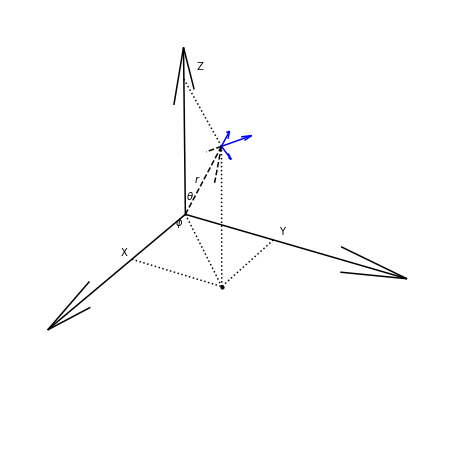

In [4]:
fig,ax=baseplot(azview=30)
def add_sph(fig,ax) :
    rhat = np.array([np.sin(theta)*np.cos(phi),
                     np.sin(theta)*np.sin(phi),
                     np.cos(theta)])
    thetahat = np.array([np.cos(theta)*np.cos(phi),
                     np.cos(theta)*np.sin(phi),
                     -np.sin(theta)])
    phihat = np.array([-np.sin(phi),np.cos(phi),0])
    ax.quiver(*(list(rvec)+list(rvec+rhat)),
              length=0.1,color="blue")
    ax.quiver(*(list(rvec)+list(rvec+thetahat)),
              length=0.1,color="blue")
    ax.quiver(*(list(rvec)+list(rvec+phihat)),
              length=0.1,color="blue")
add_sph(fig,ax)

Finally, we can write down a prescription for expressing our vector field $\boldsymbol{B}(\boldsymbol{r})$ in one basis as a function of another. Essentially we want to compute $B_r$ and the other spherical components in terms of $B_x,B_y,B_z$ or vice versa.

Let's use the example that we know $B_x,B_y,B_z$ and want to find $B_r$. We then write :

$$
B_r = \boldsymbol{B}(\boldsymbol{r}) \cdot \boldsymbol{\hat{r}} \\
\implies B_r = B_x\boldsymbol{\hat{x}} \cdot \boldsymbol{\hat{r}}  + B_y\boldsymbol{\hat{y}} \cdot \boldsymbol{\hat{r}}  +  B_z\boldsymbol{\hat{z}} \cdot \boldsymbol{\hat{r}}  + 
\\
$$

However, these dot products are just the various matrix elements of the jacobian. This allows us to immediately write succinctly :

$$
\begin{pmatrix}
B_r(\theta,\phi) \\
B_\theta(\theta,\phi) \\
B_\phi(\theta,\phi)
\end{pmatrix} = \boldsymbol{\underline{J}}(\theta,\phi)
\begin{pmatrix}
B_x \\
B_y \\ 
B_z
\end{pmatrix}
$$